In [1]:
from src.functions import *

# Global setting
with open(projectdir+'setting.json', 'r') as f:
    setting = json.load(f)
    _T = setting["T"]
    _t = setting["t"]
    _num_random_models = setting["num_random_models"]

# Load the JSON file
with open(projectdir+'instances.json', 'r') as f:
    instances = json.load(f)

with open(projectdir+'optimal_gammas.json', 'r') as f:
    optimal_gammas = json.load(f)

In [2]:
data = load_from_json(f'data/delta_vs_t.json')
delta_quantum_arr = np.asarray(data['delta'])[:,1:]
qubits_range = data['qubits_range']
time_range = data['time_range'][1:]
T = data['T']
gammas = data['gammas']

In [3]:
delta_quantum_arr_avg = np.mean(delta_quantum_arr, axis=2)
delta_quantum_arr_std = np.std(delta_quantum_arr, axis=2, ddof=1) / np.sqrt(len(delta_quantum_arr[0,0]))

In [13]:
L = 600

means = np.mean(delta_quantum_arr_avg[:,L:], axis=1)
stds = np.std(delta_quantum_arr_avg[:,L:], axis=1, ddof=1)

max_vals = np.argmax(delta_quantum_arr_avg[:,:150], axis=1)

peak_times = []
peak_deltas = []
for n_id, n in enumerate(qubits_range[:]):
    peak_times.append(time_range[max_vals[n_id]])
    peak_deltas.append(delta_quantum_arr_avg[n_id,max_vals[n_id]])

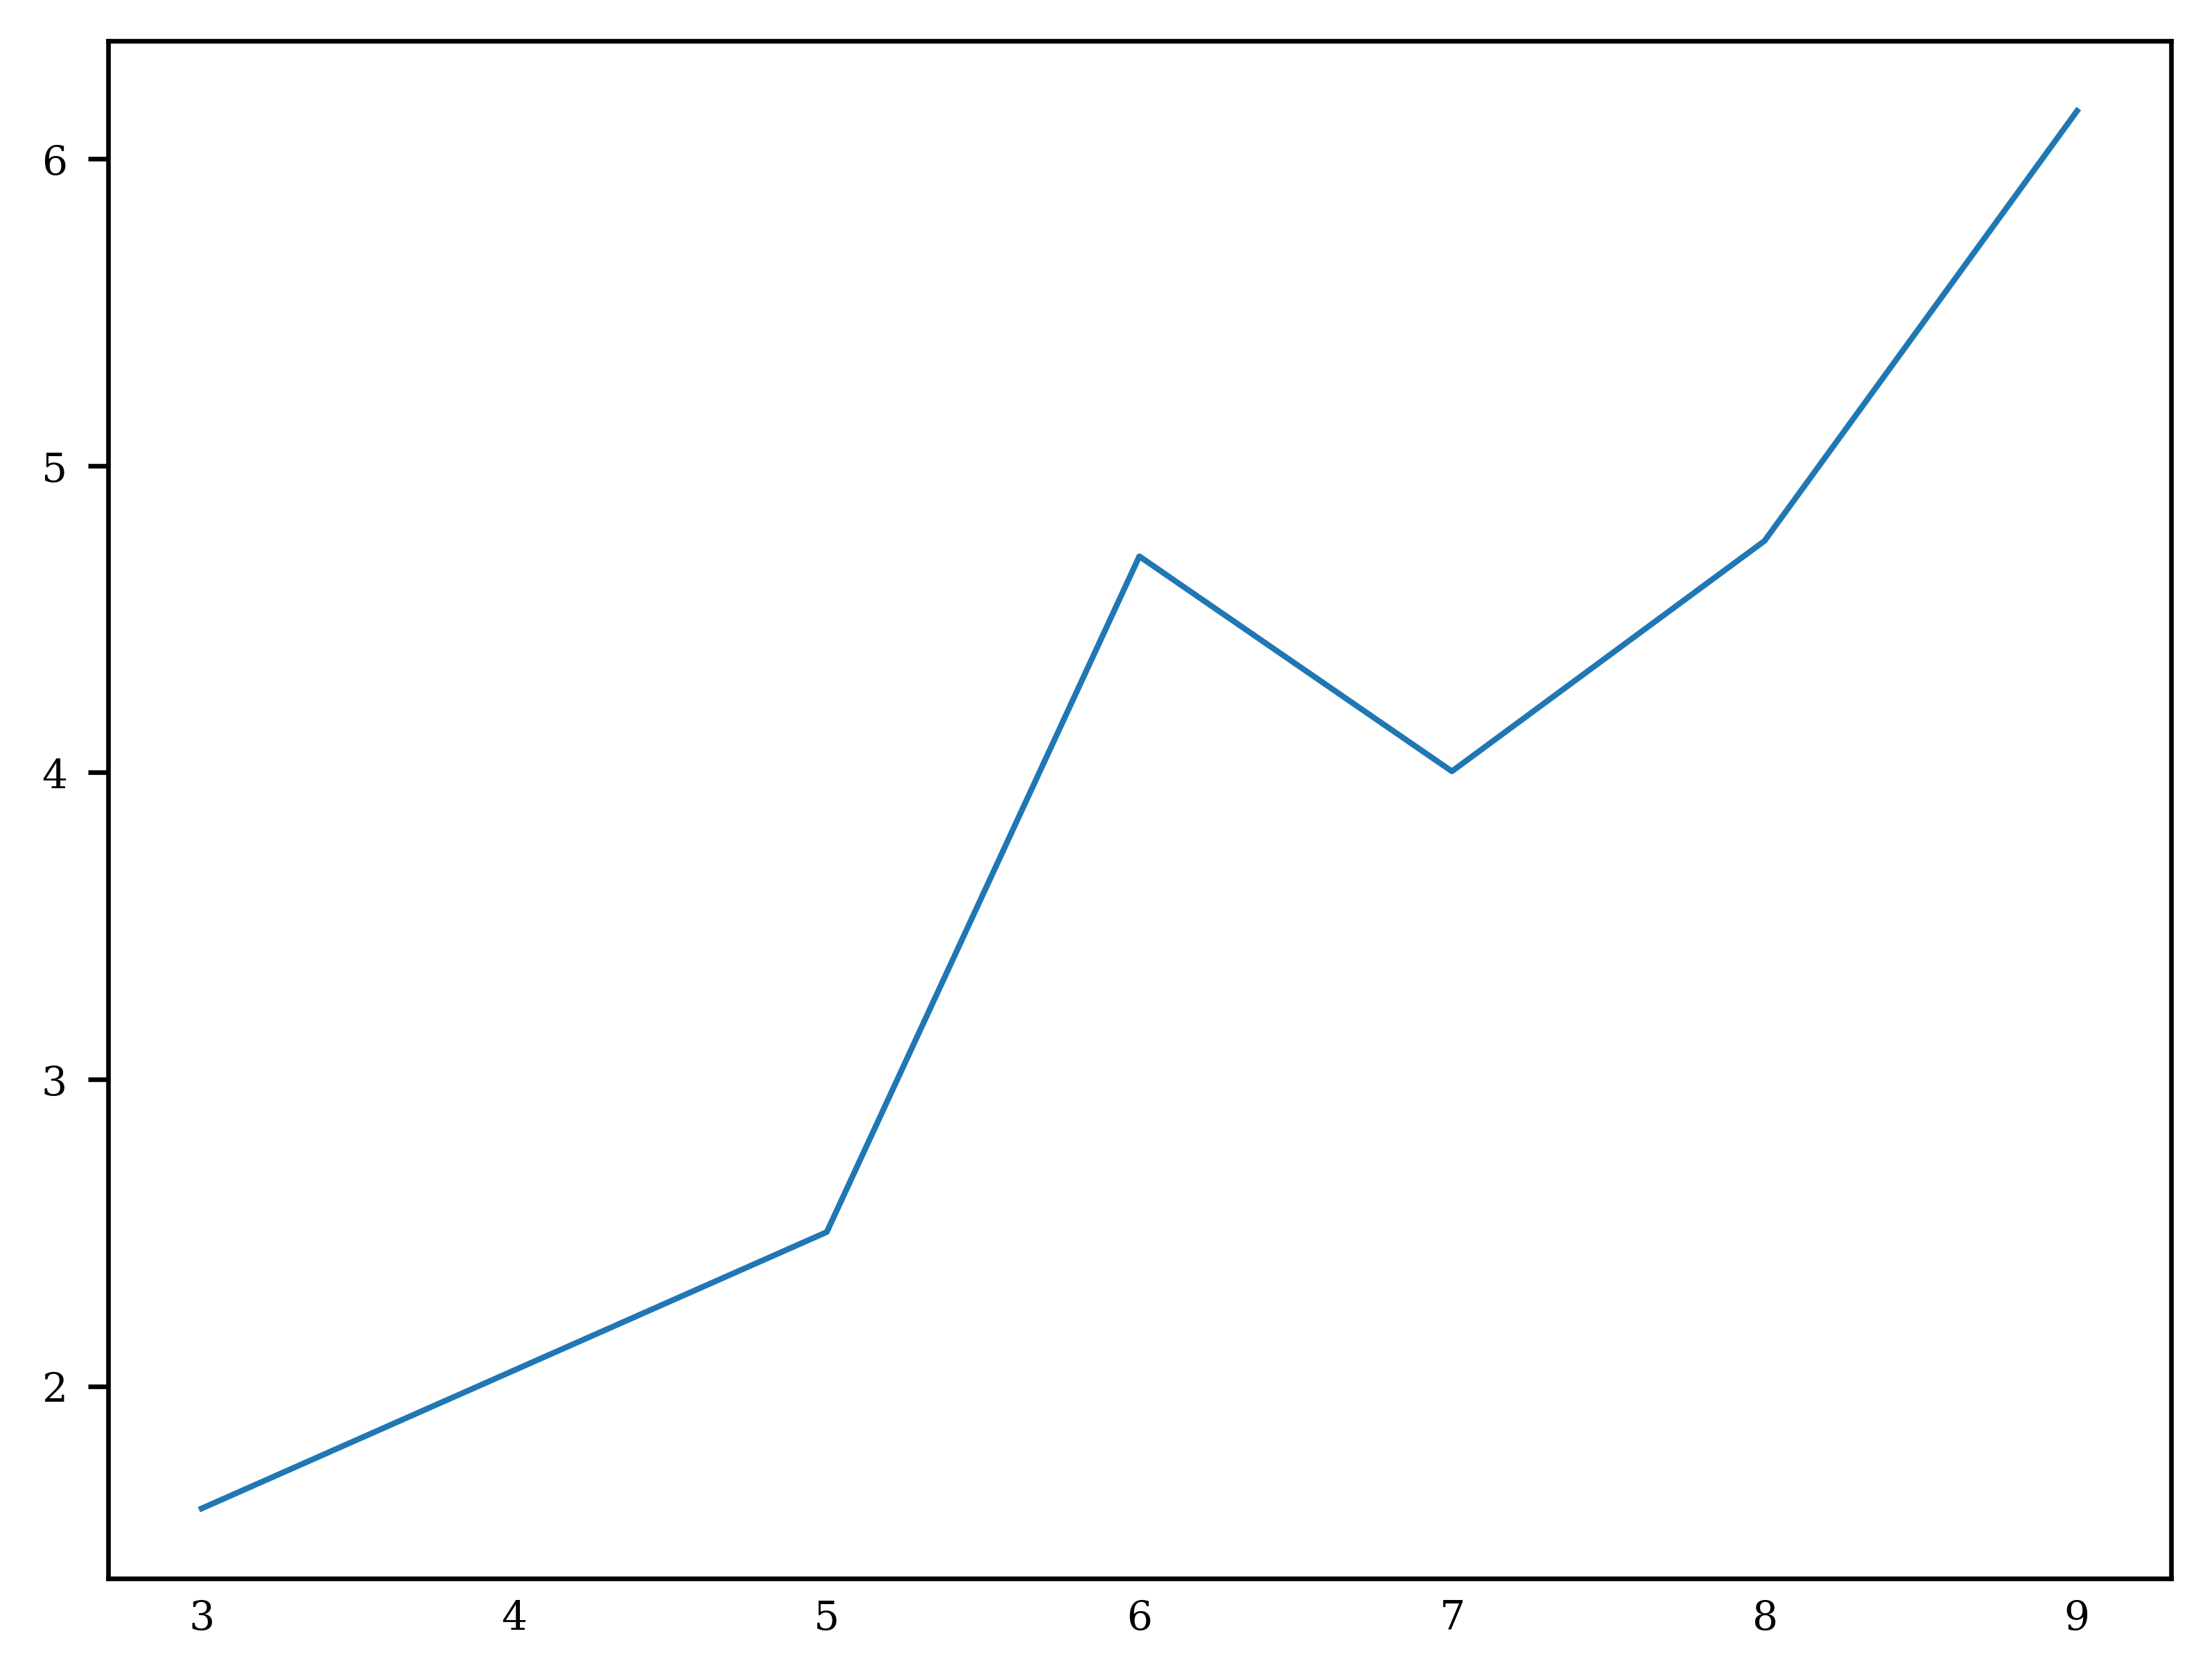

In [11]:
plt.plot(qubits_range, peak_times)

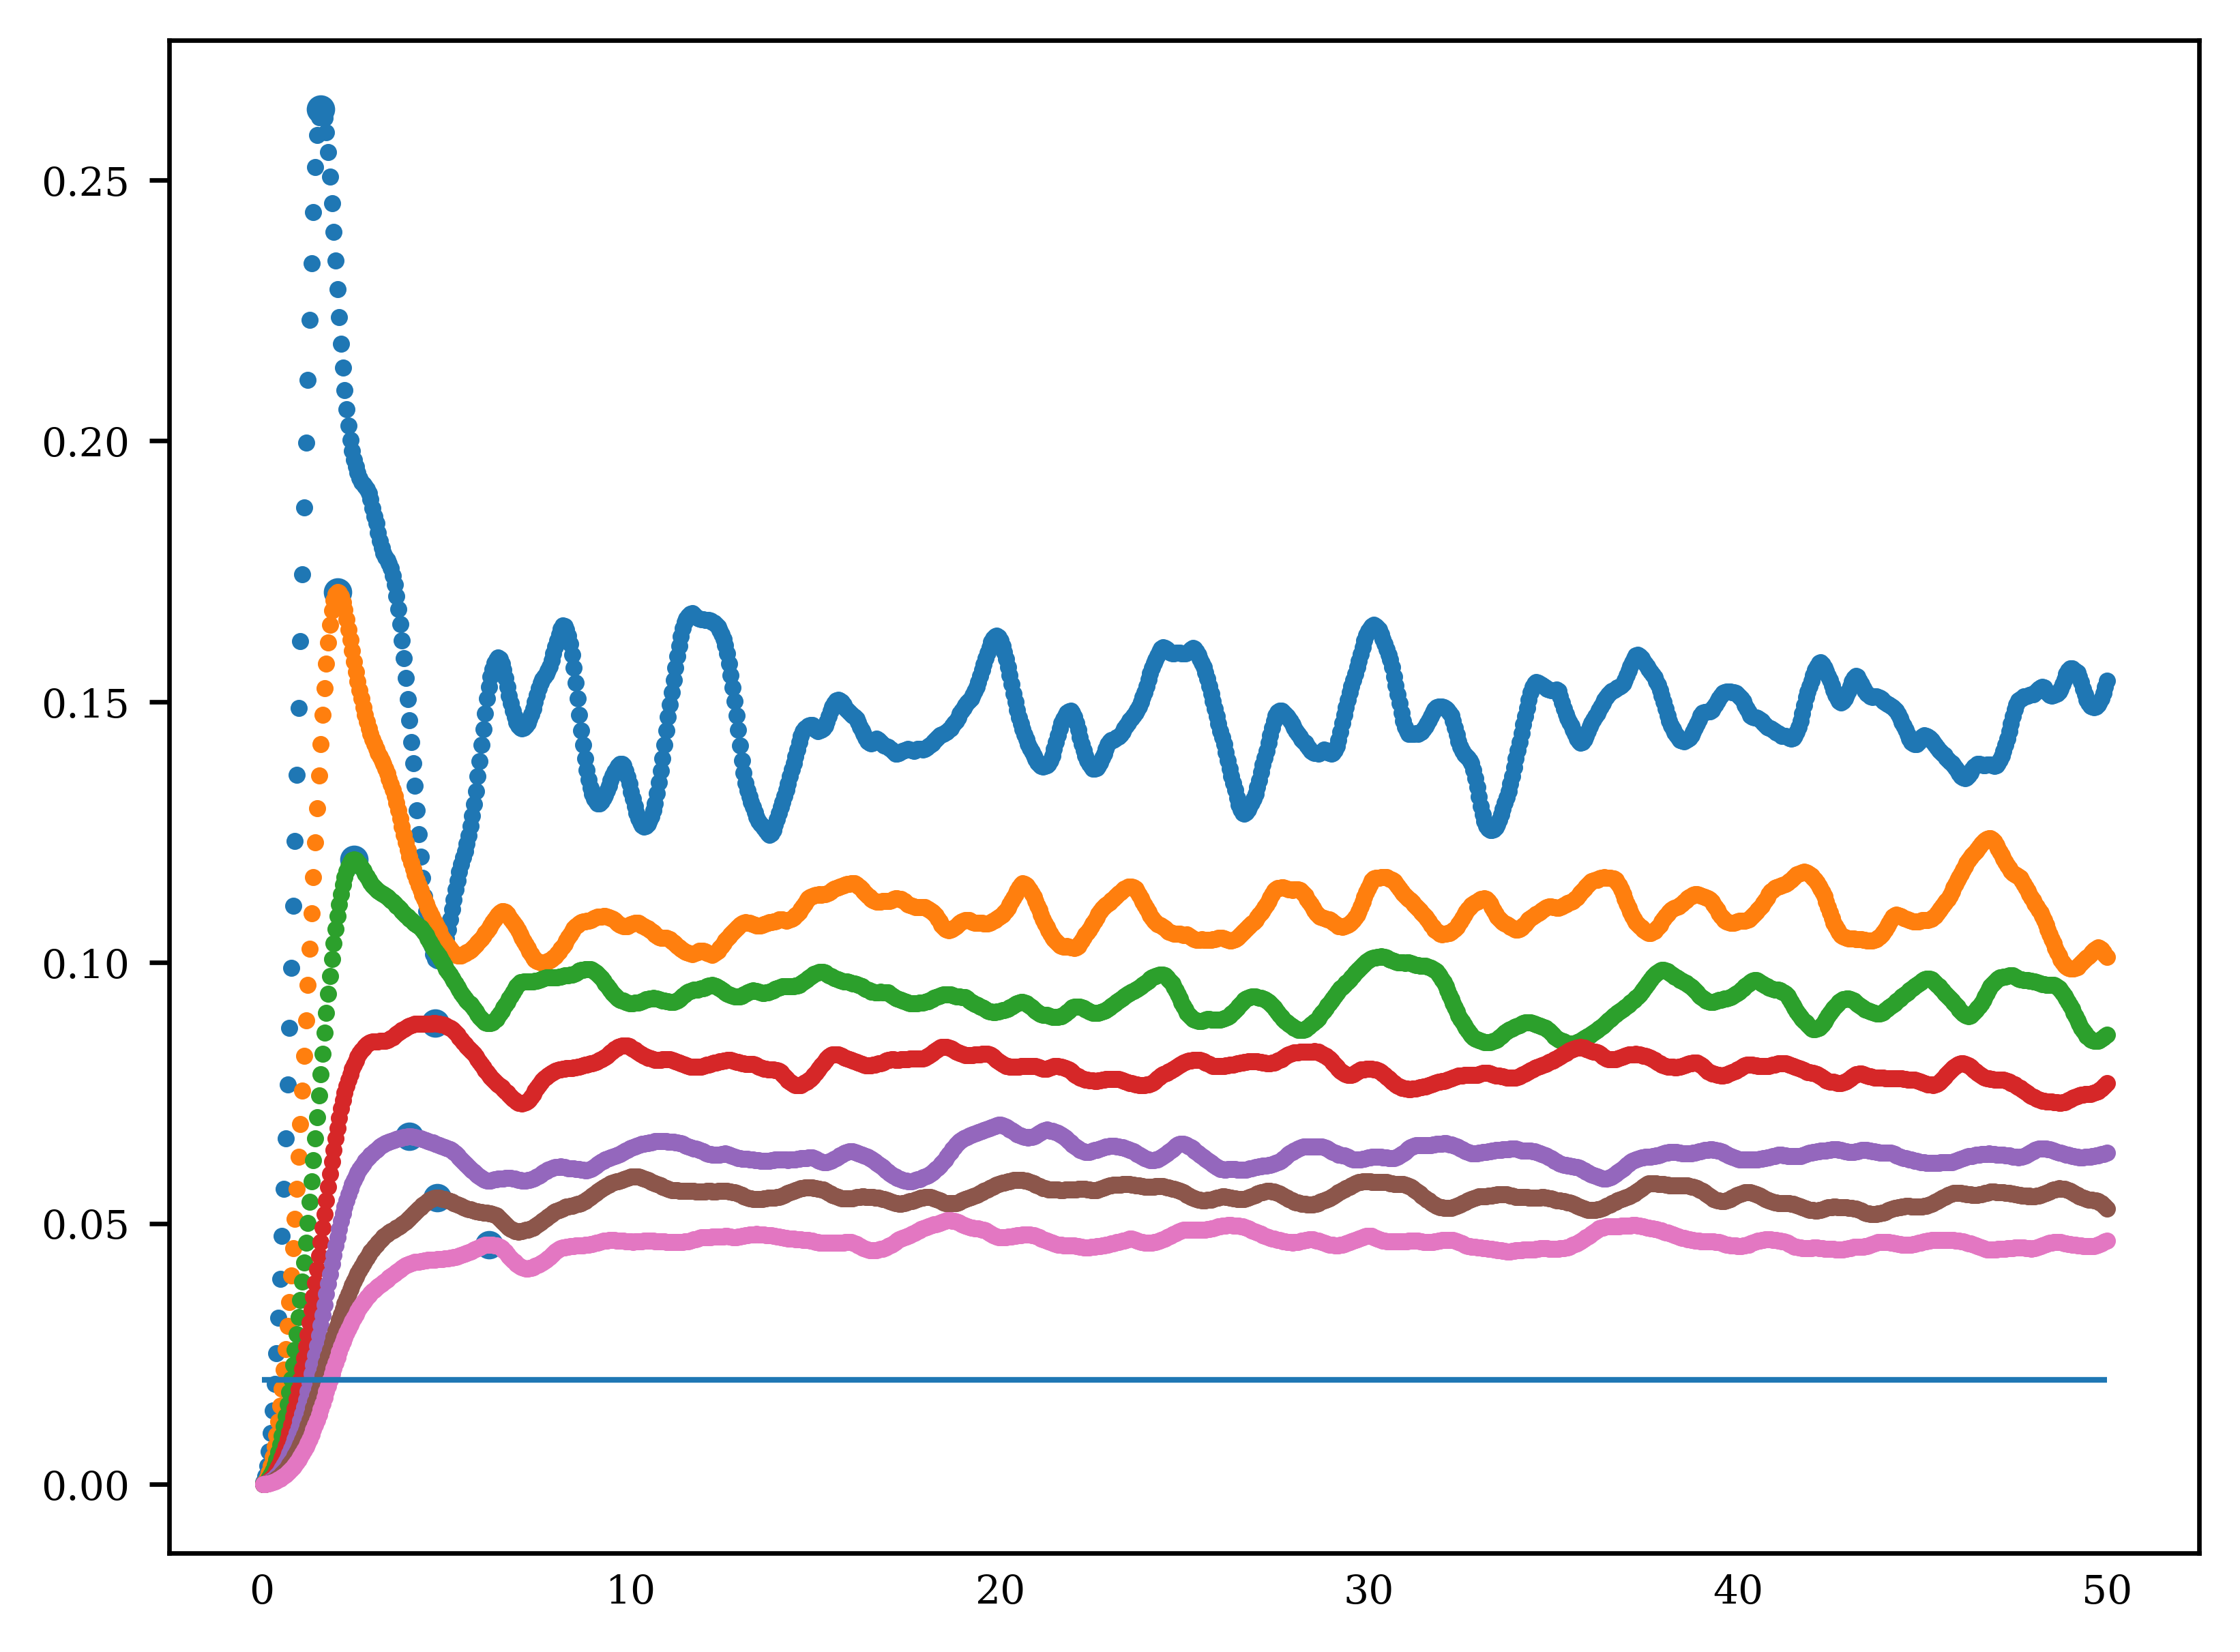

In [28]:
for n_id, n in enumerate(qubits_range[:]):
    plt.plot(time_range[:], delta_quantum_arr_avg[n_id][:], '.')

# plt.scatter([10]*7, means)
plt.scatter(peak_times, peak_deltas)
plt.hlines(0.02, 0, 50)

In [7]:
def find_convergence_point(data, mean, std, epsilon=1.1, window_size=160):
    """
    Find the convergence point in the temporal data array.
    
    Parameters:
        data (np.ndarray): Array of temporal data, f(t).
        mean (float): Long-term mean value of the data.
        std (float): Long-term standard deviation of the data.
        epsilon (float): Tolerance multiplier for the convergence criterion.
        window_size (int): Number of consecutive points that must satisfy the criterion.
    
    Returns:
        int: Index of the point of convergence, or -1 if no convergence point is found.
    """
    tolerance = epsilon * std
    for i in range(len(data) - window_size + 1):
        # Check if all points in the window satisfy the criterion
        if np.all(np.abs(data[i:i + window_size] - mean) <= tolerance):
            return i  # Return the starting index of the window
    return -1  # Return -1 if no convergence point is found

In [8]:
convergence_points = []
convergence_times = []

for n_id, n in enumerate(qubits_range[:]):
    p = find_convergence_point(delta_quantum_arr_avg[n_id], means[n_id], stds[n_id])
    convergence_points.append(p)
    convergence_times.append(time_range[p])

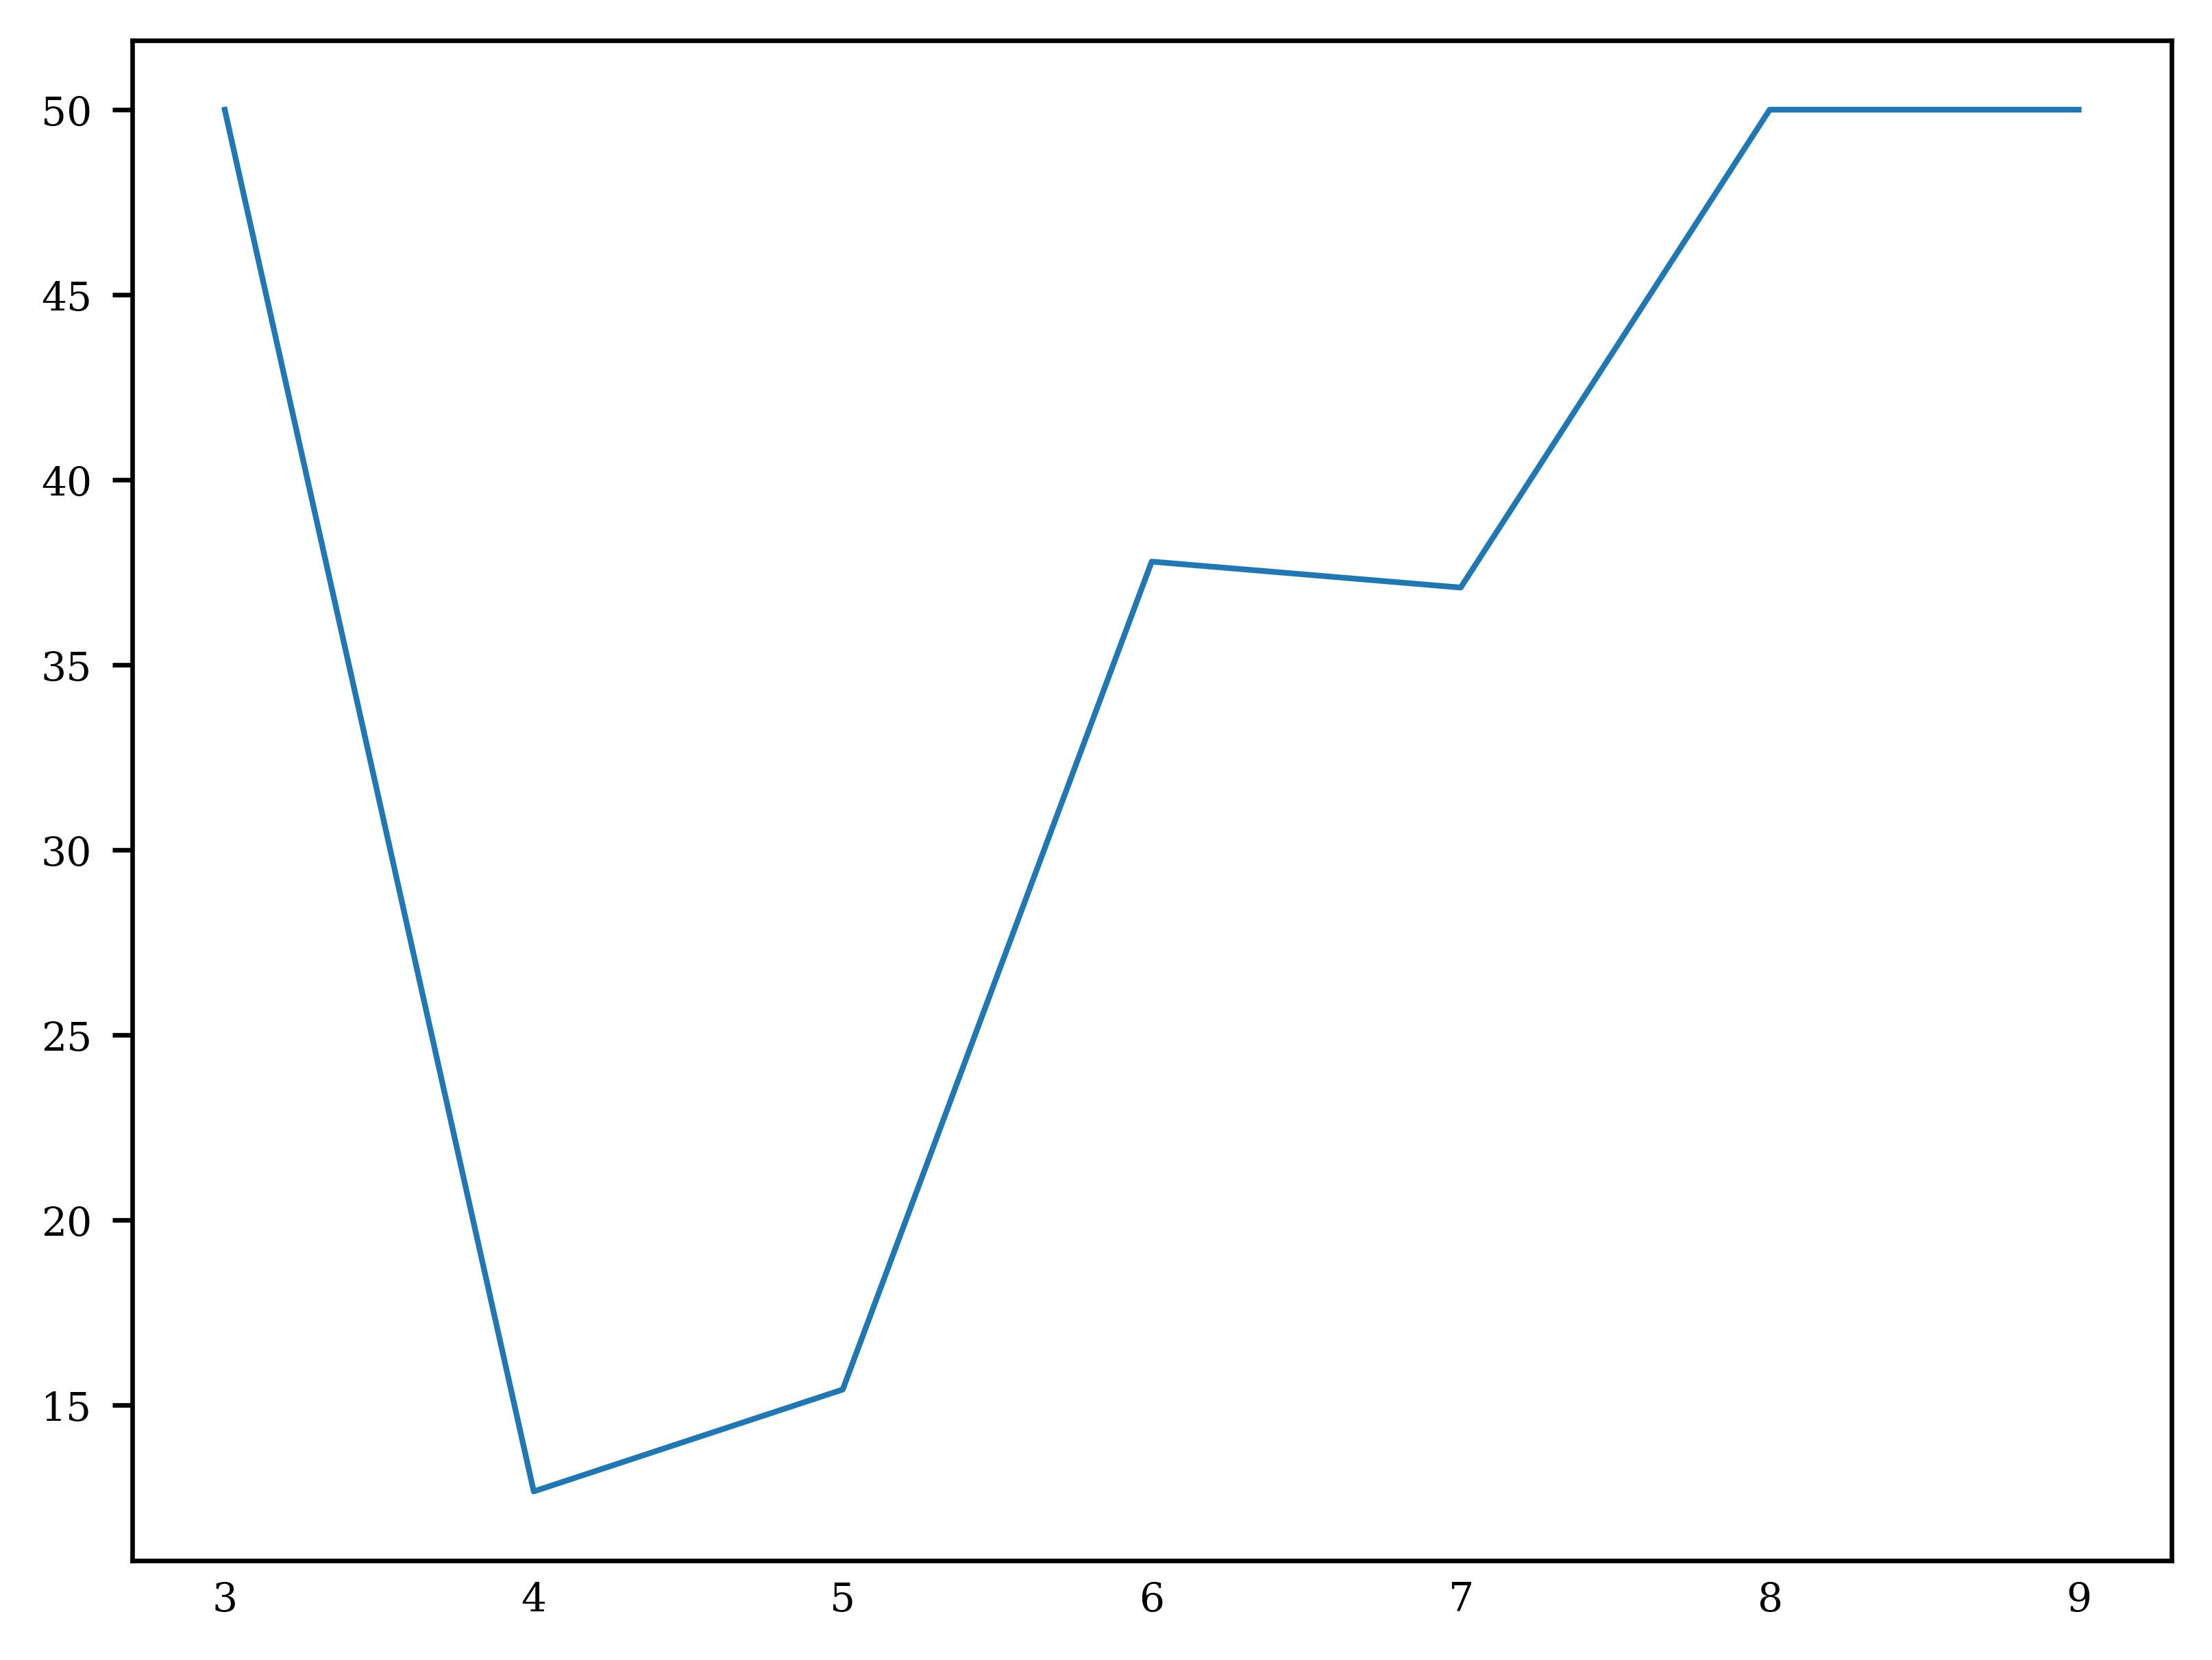

In [9]:
plt.plot(qubits_range, convergence_times)

In [24]:
def find_first_mean_hit(data, mean, epsilon=5e-3):
    """
    Find the first time index where the curve gets epsilon-close to the mean.

    Parameters:
        data (np.ndarray): Array of temporal data, f(t).
        mean (float): Long-term mean value of the data.
        epsilon (float): Threshold for being close to the mean.

    Returns:
        int: Index of the first point where the curve is epsilon-close to the mean.
    """
    for i, value in enumerate(data):
        if np.abs(value - 0.03) <= epsilon:
            return i  # Return the first index where the condition is met
    return -1  # Return -1 if no such point is found

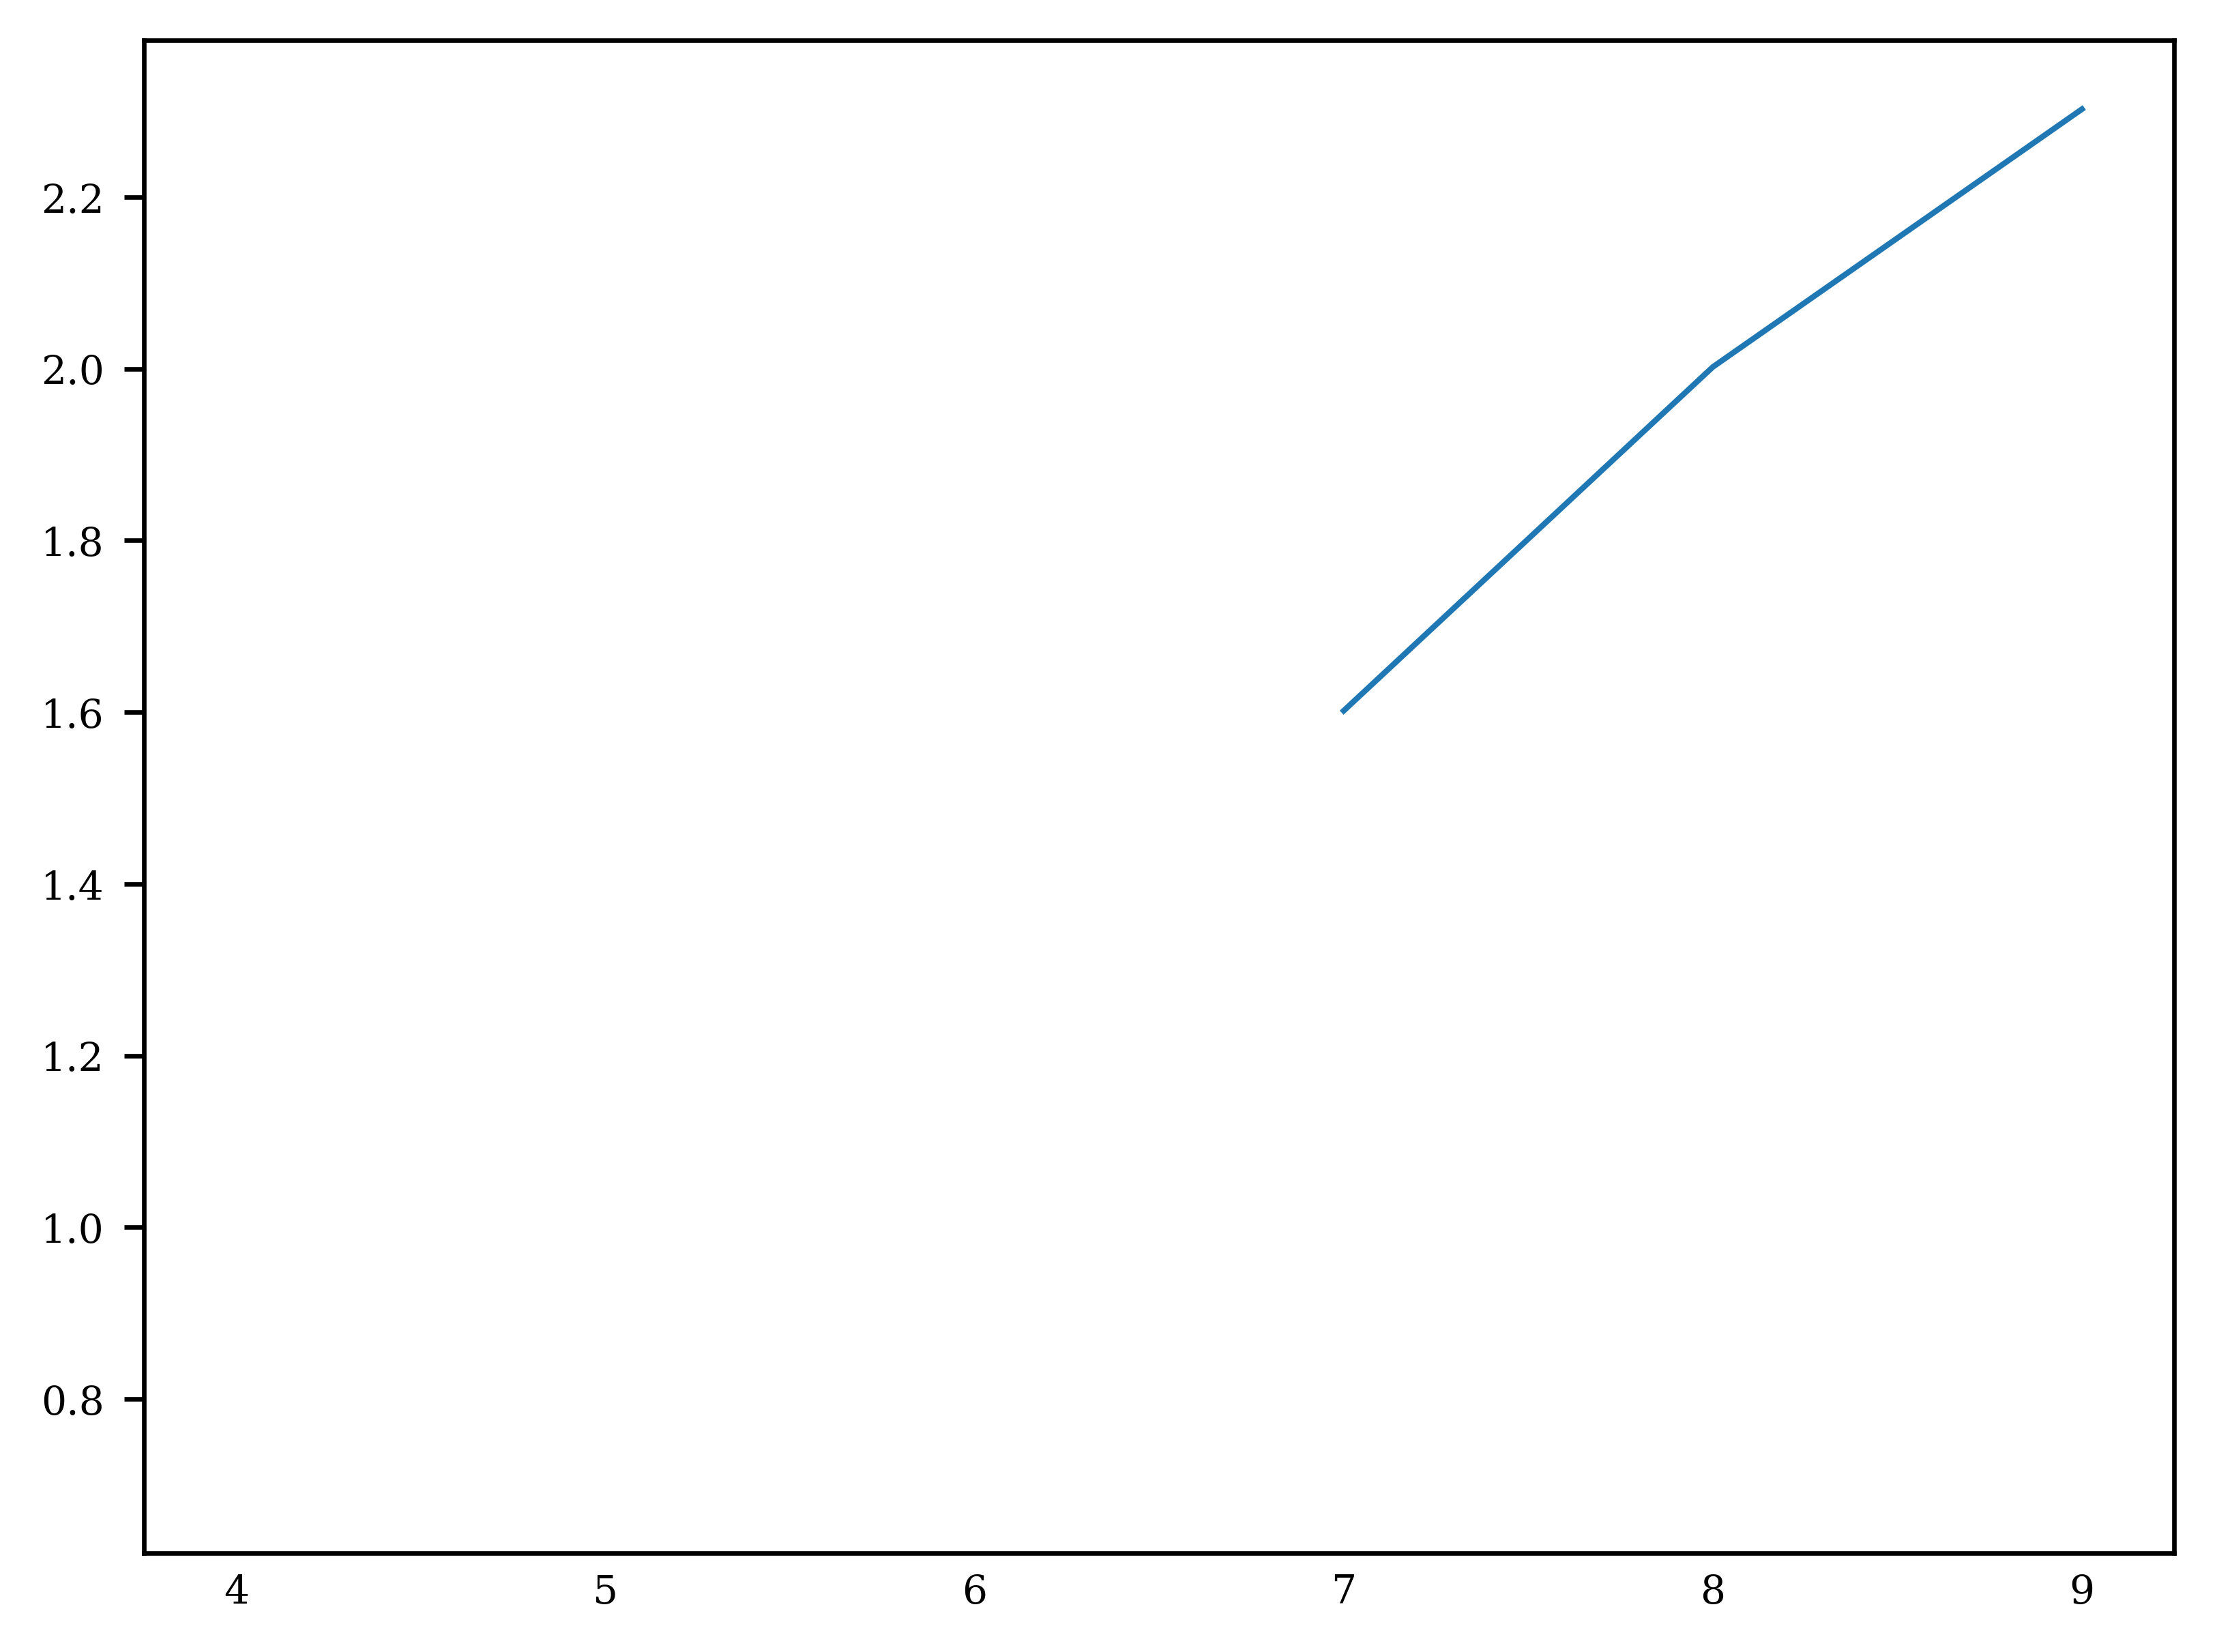

In [25]:
epsilon = 1e-3  # Set the epsilon threshold
first_mean_hits = []  # To store the first mean-hit indices

for n_id, n in enumerate(qubits_range):
    first_hit = find_first_mean_hit(delta_quantum_arr_avg[n_id], means[n_id], epsilon)
    first_mean_hits.append(first_hit)

# Convert indices to time values (if needed):
first_mean_hit_times = [time_range[hit] if hit != -1 else np.nan for hit in first_mean_hits]

plt.plot(qubits_range, first_mean_hit_times)